In [89]:
# Pre assignment imports and whatnot
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import pywt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib import colormaps

def subPlot(imgs, rowN=1, colN=1, title='', show=True, subtitles=0, cmap='gray', background='', figheight=5, figwidth=14):    # 1d
    if type(imgs) != type([]):
        fig, ax = plt.subplots(1, 1)
        fig.set_figheight(figheight)
        fig.set_figwidth(figwidth)

        if title != '':
            fig.suptitle(title)

        if background != '':
            fig.set_facecolor(background)

        if type(cmap) != int:
            ax.imshow(imgs, cmap=cmap)
        else:
            ax.imshow(imgs)
        
        ax.axis('off')
        if show:
            plt.show()
        return

    # 2d    
    if rowN == 1 or colN == 1:
        if colN == 1 and rowN == 1:
            colN = len(imgs)
        fig, ax = plt.subplots(rowN, colN)
        fig.set_figheight(figheight)
        fig.set_figwidth(figwidth)

        if title != '':
            fig.suptitle(title)

        if background != '':
            fig.set_facecolor(background)

        if rowN > colN:
            maxVal = rowN
        else:
            maxVal = colN
        for i in range(maxVal):
            if type(cmap) == int:
                ax[i].imshow(imgs[i])      
            elif type(cmap) == str:
                if cmap == '':
                    ax[i].imshow(imgs[i]) 
                else:
                    ax[i].imshow(imgs[i], cmap=cmap)
            else:
                if cmap[i] == '':
                    ax[i].imshow(imgs[i]) 
                else:
                    ax[i].imshow(imgs[i], cmap=cmap[i])

            ax[i].axis('off')
            
            if type(subtitles) != int:
                ax[i].title.set_text(subtitles[i])
        if show:
            plt.show()
        return    
        
    # 3d
    else:
        fig, ax = plt.subplots(rowN, colN)
        fig.set_figheight(15)
        fig.set_figwidth(15)

        if title != '':
            fig.suptitle(title)

        if background != '':
            fig.set_facecolor(background)

        count = 0
        for i in range(rowN):
            for j in range(colN):
                if type(cmap) == int:
                    ax[i][j].imshow(imgs[count])
                elif type(cmap) == str:
                    if cmap[count] == '':
                        ax[i][j].imshow(imgs[count])
                    else:
                        ax[i][j].imshow(imgs[count], cmap=cmap)
                else:
                    if cmap[count] == '':
                        ax[i][j].imshow(imgs[count])
                    else:
                        ax[i][j].imshow(imgs[count], cmap=cmap[count])

                if type(subtitles) != int:
                    ax[i][j].title.set_text(subtitles[count])
                ax[i][j].axis('off')
                count += 1
        
        plt.tight_layout()
        if show:
            plt.show()

def getPixelColors(rgb):
    pixel_colors = rgb.reshape((np.shape(rgb)[0]*np.shape(rgb)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    return norm(pixel_colors).tolist()

def threePlot(hsv, pixel_colors):
    h, s, v = cv2.split(hsv)
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")

    axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel("Hue")
    axis.set_ylabel("Saturation")
    axis.set_zlabel("Value")
    plt.show()

def rescale(img, tmin=0.0, tmax=255.0):
    omin = np.min(img)
    omax = np.max(img)

    m = (tmax - tmin) / (omax - omin)
    b = (-m * omin + tmin)

    return (m * img) + b

def getSE(n, m=None, seType='rect'):
    if seType == 'rect':
        if m == None:
            return np.ones((n,n), np.uint8)
        else:
            return np.ones((n,m), np.uint8)
    elif seType == 'circ':
        size = n * 2 + 1
        se = np.zeros((size,size), np.uint8)
        mid = size // 2

        for i in range(size):
            for j in range(size):
                # ((i - iCenter) ** 2 / (iCenter) ** 2) + ((j - jCenter) ** 2 / (jCenter) ** 2) = 1
                distance = np.sqrt((i - mid) ** 2 + (j - mid) ** 2) - 0.1

                if float(distance) <= mid:
                    se[i,j] = 1
        return se

def plot_color_gradient(ax, cmap):
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    ax.imshow(gradient, aspect='auto', cmap=colormaps[cmap])

def compareColorGradient(data, gradient, title=''):
    fig, ax = plt.subplots(2, 1)
    fig.set_size_inches(6, 3)
    
    ax[0].plot(data[0], data[1])
    ax[0].set_title(title)
    ticks = np.arange(0, 255, 20)
    ax[0].set_xticks(ticks)

    plot_color_gradient(ax[1], gradient)
    ax[1].set_xticks(ticks)
    ax[1].get_yaxis().set_ticks([])


    plt.tight_layout()
    plt.show()

def extract_frames(video_path, limit=9999):
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)

    frames = []
    count = 0
    while video_capture.isOpened() and count < limit:
        # Read a frame from the video file
        ret, frame = video_capture.read()

        # If there are no more frames to read, break the loop
        if not ret:
            break

        # Convert the frame to a NumPy array and append to the frames list
        frames.append(np.array(frame))

        count += 1

    # Release the video capture object
    video_capture.release()

    return frames

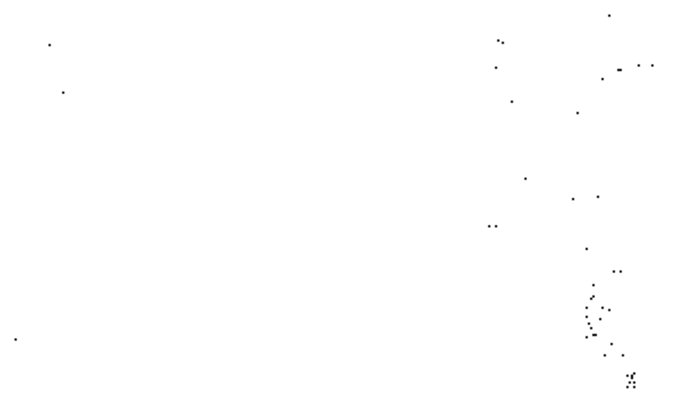

In [90]:
im = cv2.imread('test_fire/fire_im.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, im = cv2.threshold(im, 1, 255, 0)
subPlot(im)

In [91]:
fire_vid = extract_frames('test_fire/indoor1.mp4', 25)

backsub = cv2.createBackgroundSubtractorKNN()
count = 0

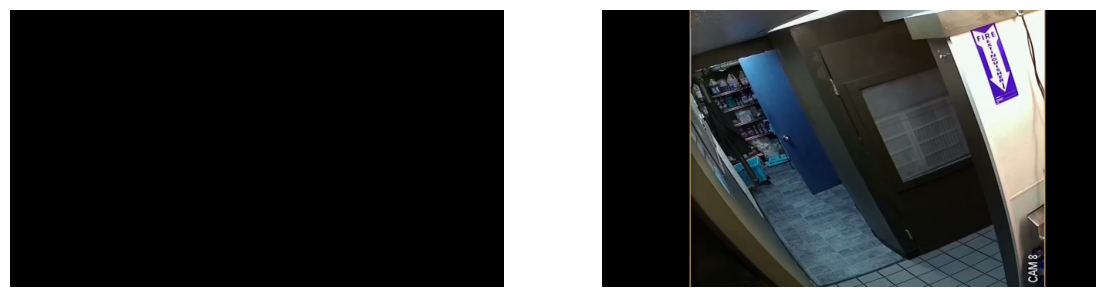

[255]


In [92]:
sub = backsub.apply(fire_vid[count])
count += 1

subPlot([sub, fire_vid[count]])
print(np.unique(sub))

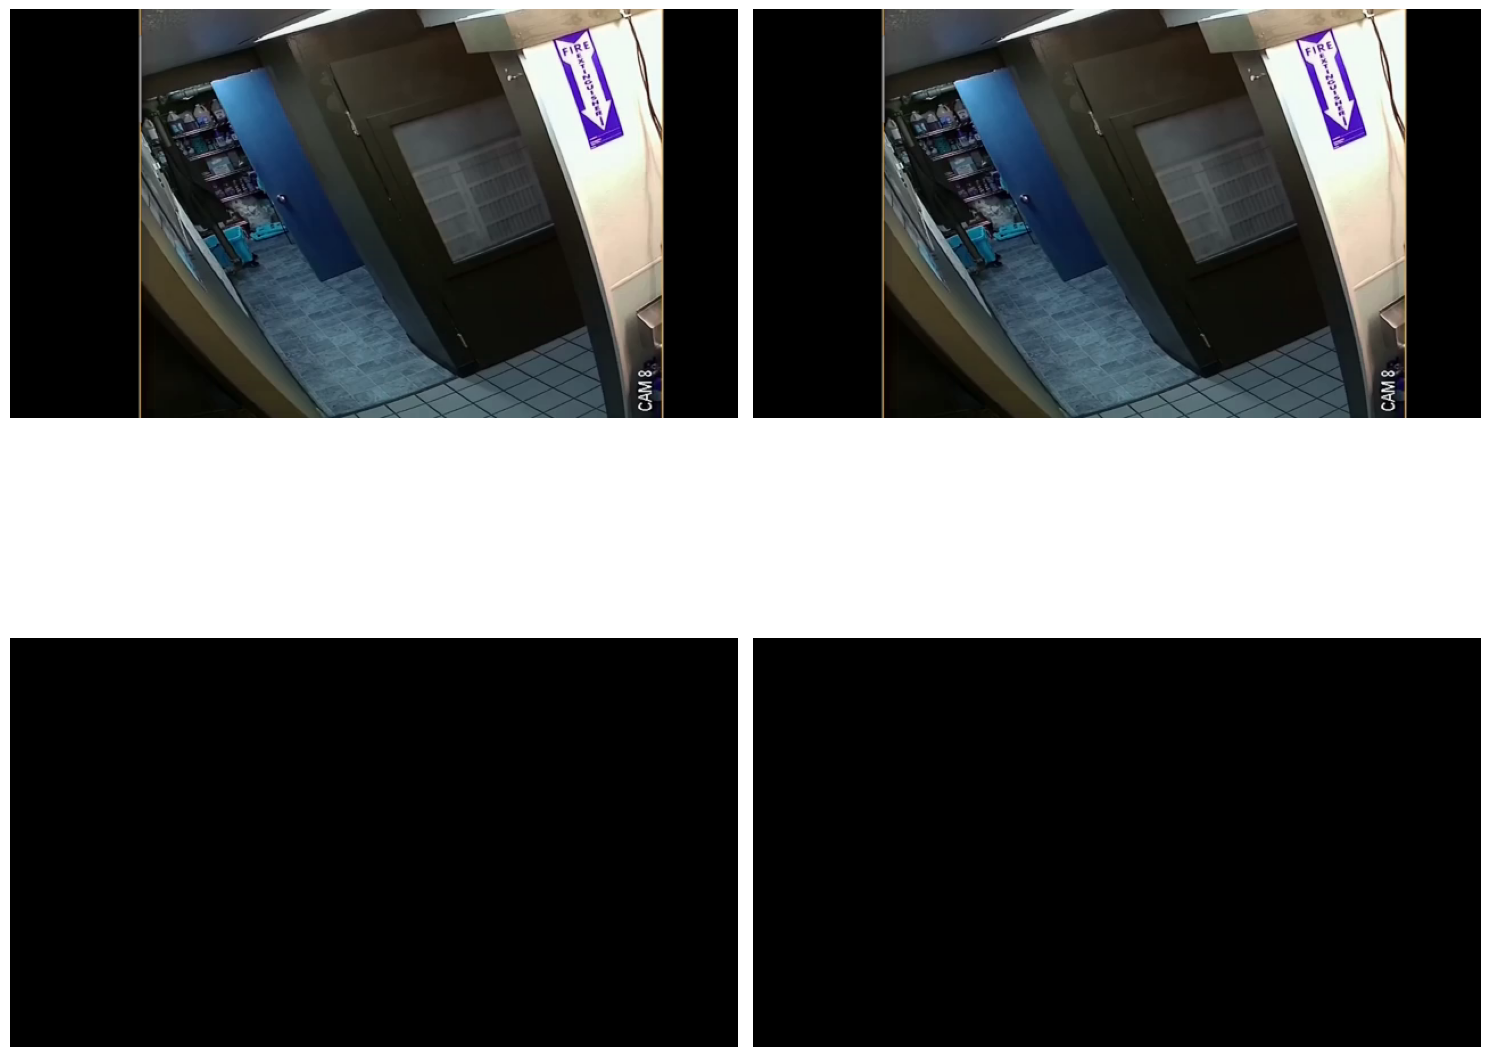

In [93]:
blobMask = sub
blobMask[blobMask > 0] = 1
# Predict color
yuv = fire_vid[count - 1]
yuvBlob = cv2.bitwise_and(yuv, yuv, mask=blobMask)

subPlot([yuv, yuvBlob, blobMask, blobMask], 2, 2)

In [118]:
yuvBlob = np.zeros_like(yuv)
yuvBlob = cv2.bitwise_and(yuv, yuv, mask=blobMask)
test = []
notzero = []

for i in range(3):
    test.append(yuvBlob[:, :, i].flatten())
    
test = np.array(test)
print(test.shape)
notzero = []
# for i in range(3):
#     notzero.append(test[i])

# print(len(notzero[0]))
# print(len(notzero[1]))
# print(len(notzero[2]))

# for i in range(3):
#     notzero.append(test[test[i, :] != 0])

# notzero.shape
# print(notzero[0].shape)
# print(notzero[1].shape)
# print(notzero[2].shape)

(3, 230400)


In [127]:
np.unique(sub, return_counts=True)[0][0]

1

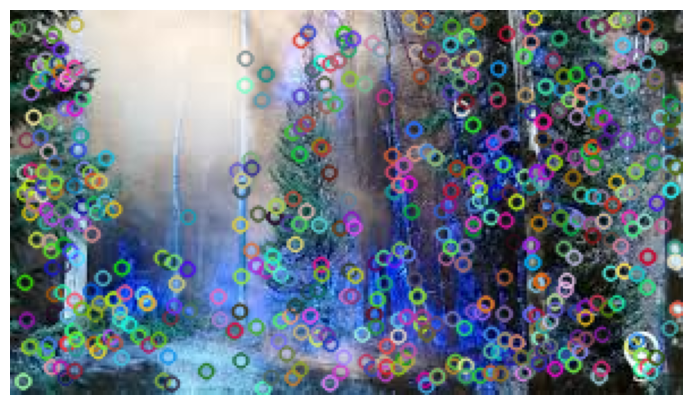

In [96]:
im = cv2.imread('test_fire/fire_im.jpg')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT.create()
kp = sift.detect(gray, None)

im = cv2.drawKeypoints(im, kp, im)
subPlot(im)

In [2]:
from main import main

results = main(verbose=False)

Extracting Frames


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\core\src\alloc.cpp:73: error: (-4:Insufficient memory) Failed to allocate 691200 bytes in function 'cv::OutOfMemoryError'
